## Batch Normalization

In the rise of deep learning, one of the most important ideas has been an algorithm called batch normalization (also known as batch norm).

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

Batch normalization can be implemented during training by calculating the mean and standard deviation of each input variable to a layer per mini-batch and using these statistics to perform the standardization.

The benefits of batch normalization are:

- A deep neural network can be trained faster: Although each training iteration will be slower because of the extra normalization calculation during the forward pass and the additional hyperparameters to train during backpropagation, it should converge much more quickly; thus, training should be faster overall.

- Higher learning rate: Gradient descent generally requires small learning rates for the network to converge. As networks become deeper, gradients become smaller during backpropagation and thus require even more iterations. Using batch normalization allows much higher learning rates, thereby increasing the speed of training.

- Easier to initialize weight: Weight initialization can be difficult, particularly when creating deeper networks. Batch normalization reduces the sensitivity to the initial starting weights.

## Batch Normalization implementation

### Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

2022-11-10 22:08:48.782612: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-10 22:08:48.880265: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-10 22:08:48.880280: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-10 22:08:48.902403: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-10 22:08:49.338856: W tensorflow/stream_executor/platform/de

### Loading dataset

In [2]:
# Load data into a DataFrame
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Append "target" and name it "label"
df['label'] = dataset.target

# Use string label instead
df['label'] = df.label.replace(dict(enumerate(dataset.target_names)))

### Exploring dataset

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Preparing data for TensorFlow

In [4]:
# Transform label to one-hot encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)

# Drop old label
df.drop(['label'], axis=1, inplace=True)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [6]:
# Creating X and y

# Convert DataFrame into np array
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
X = np.asarray(X)

# Convert DataFrame into np array
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
y = np.asarray(y)

In [7]:
# Split the data set in a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  random_state=42
)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112, 3)
(38, 3)


### Batch normalization

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [10]:
# Model without batch normalization
model = Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
]);

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 37,763
Trainable params: 37,763
Non-traina

2022-11-10 22:08:50.323450: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-10 22:08:50.323657: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-10 22:08:50.323672: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fabio-XPS-15-7590): /proc/driver/nvidia/version does not exist
2022-11-10 22:08:50.324252: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# Model with batch normalization
model = Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(3, activation='softmax')
]);

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                320       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_2 (Batc  (None, 128)             

In [12]:
from tensorflow.keras.initializers import RandomNormal, Constant

# Model with a customized batch normalization
model = Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)
    ),
    Dense(3, activation='softmax')
]);

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                320       
                                                                 
 batch_normalization_5 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_6 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_7 (Batc  (None, 128)             

### Model training

In [14]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [15]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 1s - loss: 1.1771 - accuracy: 0.4643 - val_loss: 1.0644 - val_accuracy: 0.4286 - 1s/epoch - 403ms/step
Epoch 2/200
3/3 - 0s - loss: 0.3819 - accuracy: 0.8690 - val_loss: 1.0660 - val_accuracy: 0.6429 - 25ms/epoch - 8ms/step
Epoch 3/200
3/3 - 0s - loss: 0.2907 - accuracy: 0.9167 - val_loss: 1.0766 - val_accuracy: 0.6429 - 25ms/epoch - 8ms/step
Epoch 4/200
3/3 - 0s - loss: 0.2219 - accuracy: 0.9524 - val_loss: 1.0953 - val_accuracy: 0.6071 - 25ms/epoch - 8ms/step
Epoch 5/200
3/3 - 0s - loss: 0.2281 - accuracy: 0.9405 - val_loss: 1.1101 - val_accuracy: 0.5357 - 28ms/epoch - 9ms/step
Epoch 6/200
3/3 - 0s - loss: 0.1688 - accuracy: 0.9286 - val_loss: 1.1336 - val_accuracy: 0.2143 - 25ms/epoch - 8ms/step
Epoch 7/200
3/3 - 0s - loss: 0.1964 - accuracy: 0.9524 - val_loss: 1.1456 - val_accuracy: 0.2143 - 27ms/epoch - 9ms/step
Epoch 8/200
3/3 - 0s - loss: 0.1658 - accuracy: 0.9524 - val_loss: 1.1603 - val_accuracy: 0.2143 - 25ms/epoch - 8ms/step
Epoch 9/200
3/3 - 0s - loss: 0.2

Epoch 69/200
3/3 - 0s - loss: 0.0928 - accuracy: 0.9762 - val_loss: 0.4046 - val_accuracy: 0.9643 - 24ms/epoch - 8ms/step
Epoch 70/200
3/3 - 0s - loss: 0.0736 - accuracy: 0.9762 - val_loss: 0.3989 - val_accuracy: 1.0000 - 22ms/epoch - 7ms/step
Epoch 71/200
3/3 - 0s - loss: 0.0687 - accuracy: 1.0000 - val_loss: 0.3876 - val_accuracy: 1.0000 - 26ms/epoch - 9ms/step
Epoch 72/200
3/3 - 0s - loss: 0.0795 - accuracy: 0.9762 - val_loss: 0.3864 - val_accuracy: 1.0000 - 24ms/epoch - 8ms/step
Epoch 73/200
3/3 - 0s - loss: 0.0668 - accuracy: 0.9762 - val_loss: 0.3876 - val_accuracy: 1.0000 - 24ms/epoch - 8ms/step
Epoch 74/200
3/3 - 0s - loss: 0.0712 - accuracy: 0.9762 - val_loss: 0.3752 - val_accuracy: 1.0000 - 24ms/epoch - 8ms/step
Epoch 75/200
3/3 - 0s - loss: 0.1293 - accuracy: 0.9524 - val_loss: 0.3750 - val_accuracy: 1.0000 - 26ms/epoch - 9ms/step
Epoch 76/200
3/3 - 0s - loss: 0.0837 - accuracy: 0.9881 - val_loss: 0.3727 - val_accuracy: 1.0000 - 22ms/epoch - 7ms/step
Epoch 77/200
3/3 - 0s - 

Epoch 136/200
3/3 - 0s - loss: 0.0923 - accuracy: 0.9643 - val_loss: 0.1344 - val_accuracy: 1.0000 - 25ms/epoch - 8ms/step
Epoch 137/200
3/3 - 0s - loss: 0.0647 - accuracy: 0.9762 - val_loss: 0.1323 - val_accuracy: 1.0000 - 21ms/epoch - 7ms/step
Epoch 138/200
3/3 - 0s - loss: 0.0658 - accuracy: 0.9881 - val_loss: 0.1248 - val_accuracy: 0.9643 - 27ms/epoch - 9ms/step
Epoch 139/200
3/3 - 0s - loss: 0.0768 - accuracy: 0.9643 - val_loss: 0.1181 - val_accuracy: 0.9643 - 21ms/epoch - 7ms/step
Epoch 140/200
3/3 - 0s - loss: 0.0406 - accuracy: 1.0000 - val_loss: 0.1132 - val_accuracy: 0.9643 - 23ms/epoch - 8ms/step
Epoch 141/200
3/3 - 0s - loss: 0.0409 - accuracy: 1.0000 - val_loss: 0.1077 - val_accuracy: 0.9643 - 24ms/epoch - 8ms/step
Epoch 142/200
3/3 - 0s - loss: 0.0766 - accuracy: 0.9881 - val_loss: 0.1094 - val_accuracy: 0.9643 - 24ms/epoch - 8ms/step
Epoch 143/200
3/3 - 0s - loss: 0.0836 - accuracy: 0.9881 - val_loss: 0.1380 - val_accuracy: 0.9643 - 23ms/epoch - 8ms/step
Epoch 144/200
3/

### Model evaluation

Finally, we plot training and validation loss and accuracy to observe how the accuracy of our model improves over time.

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_' + metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation ' + metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_' + metric])
    plt.show()

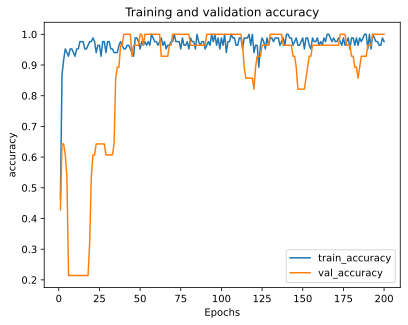

In [17]:
plot_metric(history, 'accuracy')

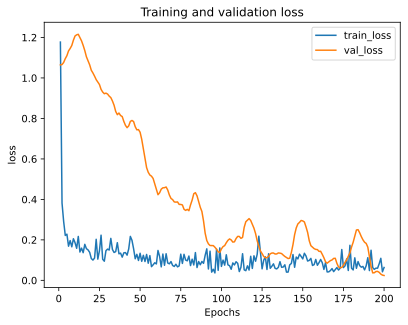

In [18]:
plot_metric(history, 'loss')

In [19]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

2/2 - 0s - loss: 0.0877 - accuracy: 0.9737 - 18ms/epoch - 9ms/step


[0.08765500038862228, 0.9736841917037964]